In [1]:
import numpy as np

np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1) # y = 3X + 4 + 가우시안 노이즈

In [4]:
import matplotlib.pyplot as plt

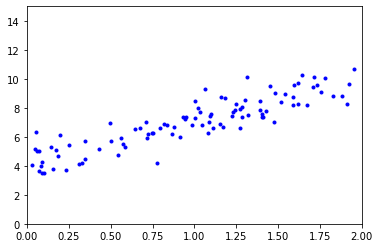

In [6]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* 정규방정식 사이킷런 사용

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_

array([4.19268687])

In [9]:
lin_reg.coef_

array([[2.88931748]])

In [10]:
lin_reg.score(X,y)

0.7983193910209092

* 배치 경사하강법

In [13]:
X_b = np.c_[np.ones((100, 1)), X]

In [14]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

In [15]:
theta

array([[0.34175598],
       [1.87617084]])

In [16]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 예측: X_b.dot(theta), 실제: y
    theta = theta - eta * gradients  

In [17]:
theta

array([[4.19268687],
       [2.88931748]])

* 배치 경사하강법

In [18]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

In [19]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[4.1568776 ],
       [2.86543173]])

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(max_iter = 50, eta0=0.1, penalty=None ,random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [23]:
sgd_reg.intercept_

array([4.20090975])

In [24]:
sgd_reg.coef_

array([2.93075572])

## 다항 회귀

In [25]:
import numpy as np

In [38]:
np.random.seed(42)

In [39]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

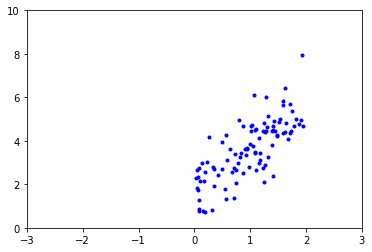

In [40]:
plt.plot(X, y, "b.")
plt.axis([-3,3,0,10])
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
ploy_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = ploy_features.fit_transform(X)

In [42]:
ploy_features.get_feature_names()

['x0', 'x0^2']

In [43]:
X[0]

array([1.75474614])

In [44]:
X_poly[0]

array([1.75474614, 3.07913403])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [46]:
lin_reg.intercept_, lin_reg.coef_ # y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

(array([1.77383]), array([[1.79179238, 0.06264673]]))